In [57]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
plt.rcParams['savefig.dpi'] = 1000

In [58]:
df = pd.read_csv('control_delta_Pmax_0.1', delim_whitespace = True, header = None)
df.head()

,0,1,2,3,4,5,6,7,8
0,0.0,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000
1,0.1,-0.000173,0.012686,0.012716,0.000173,-0.012686,-0.012716,0.012686,-0.012686
2,0.2,-0.000583,0.024194,0.024301,0.000583,-0.024194,-0.024301,0.024194,-0.024194
3,0.3,-0.001142,0.034541,0.034753,0.001142,-0.034541,-0.034753,0.034541,-0.034541
4,0.4,-0.001804,0.043760,0.044086,0.001804,-0.043760,-0.044086,0.043760,-0.043760


In [59]:
delta = df.loc[:,0]
controls = df.loc[:, 1:8]
controls_abs = controls.abs()
controls_sum = controls_abs.sum(axis=1)

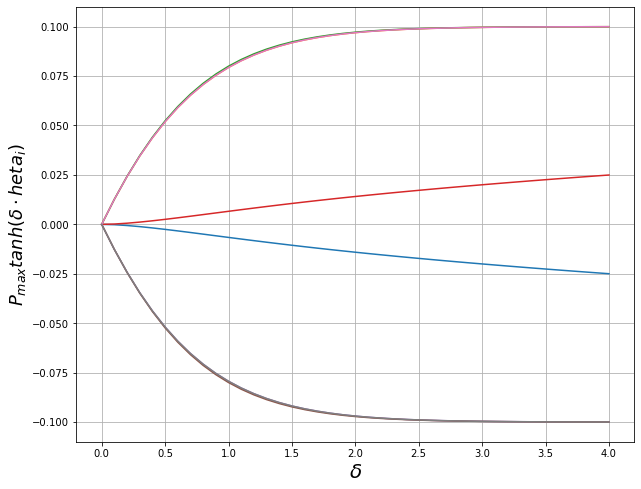

In [60]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(delta, controls)
ax.set_xlabel('$\delta$', fontsize=20, rotation=0)
ax.set_ylabel('$P_{max} tanh( \delta \cdot \theta_{i} )$', fontsize=18, rotation=90)
plt.grid()
plt.show()

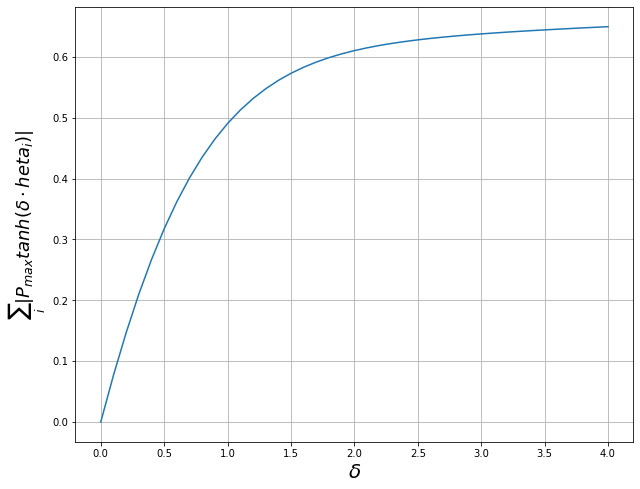

In [61]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(delta, controls_sum)
ax.set_xlabel('$\delta$', fontsize=20, rotation=0)
ax.set_ylabel('$\sum_i | P_{max} tanh( \delta \cdot \theta_{i} )| $', fontsize=18, rotation=90)
plt.grid()
plt.show()

In [62]:
df2 = pd.read_csv('control_delta_Pmax_0.2', delim_whitespace = True, header = None)

In [63]:
delta2 = df2.loc[:,0]
controls2 = df2.loc[:, 1:8]
controls_abs2 = controls2.abs()
controls_sum2 = controls_abs2.sum(axis=1)

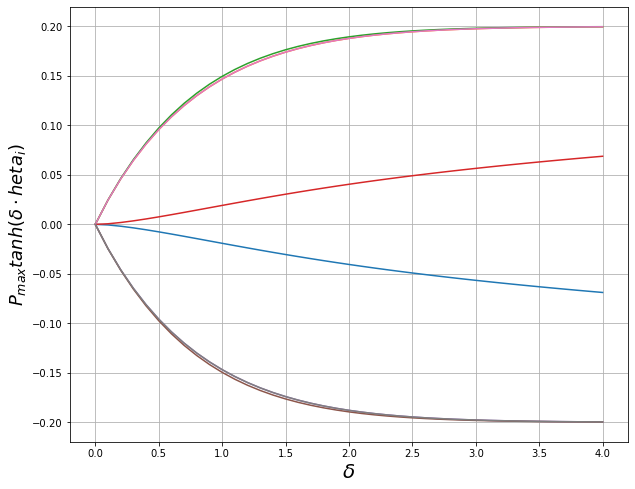

In [64]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(delta2, controls2)
ax.set_xlabel('$\delta$', fontsize=20, rotation=0)
ax.set_ylabel('$P_{max} tanh( \delta \cdot \theta_{i} ) $', fontsize=18, rotation=90)
plt.grid()
plt.show()

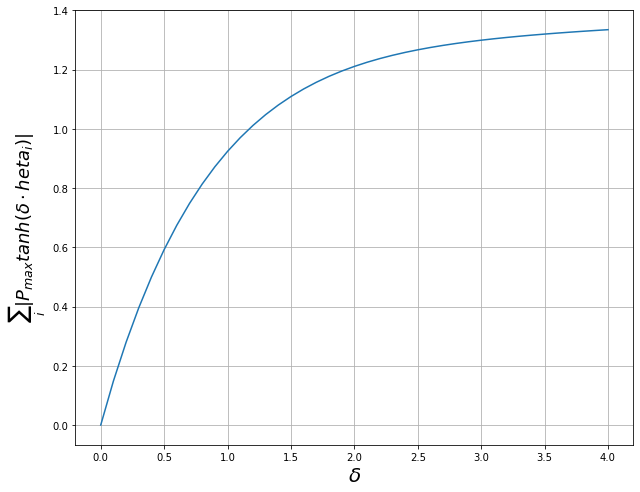

In [65]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(delta2, controls_sum2)
ax.set_xlabel('$\delta$', fontsize=20, rotation=0)
ax.set_ylabel('$\sum_i | P_{max} tanh( \delta \cdot \theta_{i} )| $', fontsize=18, rotation=90)
plt.grid()
plt.show()


#plt.plot(delta2, controls_sum2)
#plt.xlabel("$\delta$")
#plt.ylabel("$\sum_i | P_{max} tanh( \delta \cdot \theta_{i} )| $")
#plt.show()

In [5]:
df3 = pd.read_csv('control_delta_Pmax2', delim_whitespace = True, header = None)
df3.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0
1,0.1,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0
2,0.2,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0
3,0.3,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0
4,0.4,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0


In [6]:
delta3 = df3.loc[:,0]
Pmax3 = df3.loc[:,1]
controls3 = df3.loc[:, 2:9]
controls_abs3 = controls3.abs()
controls_sum3 = controls_abs3.sum(axis=1)

In [41]:
delta3 = np.matrix(delta3)
Pmax3 = np.matrix(Pmax3)
control_sum3 = np.matrix(controls_sum3)
print(delta3.shape)
x = np.reshape(delta3, (492))
print(x.shape)
x = np.reshape(delta3, (123, 4))
print(x.shape)

(1, 492)
(1, 492)
(123, 4)


In [42]:
len(delta3)
x = np.reshape(delta3, (4, 123))
y = np.reshape(Pmax3, (4, 123))
z = np.reshape(control_sum3, (4, 123))

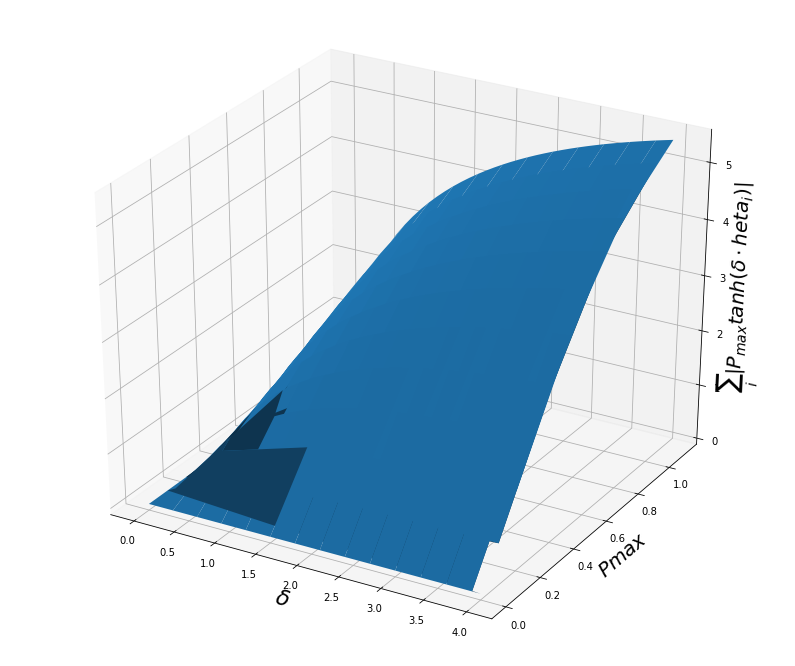

In [66]:
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z)

ax.set_xlabel('$\delta$', fontsize=22, rotation=150)
ax.set_ylabel('$Pmax$', fontsize=20)
ax.set_zlabel('$\sum_i | P_{max} tanh( \delta \cdot \theta_{i} )| $', fontsize=20, rotation=60)
plt.show()

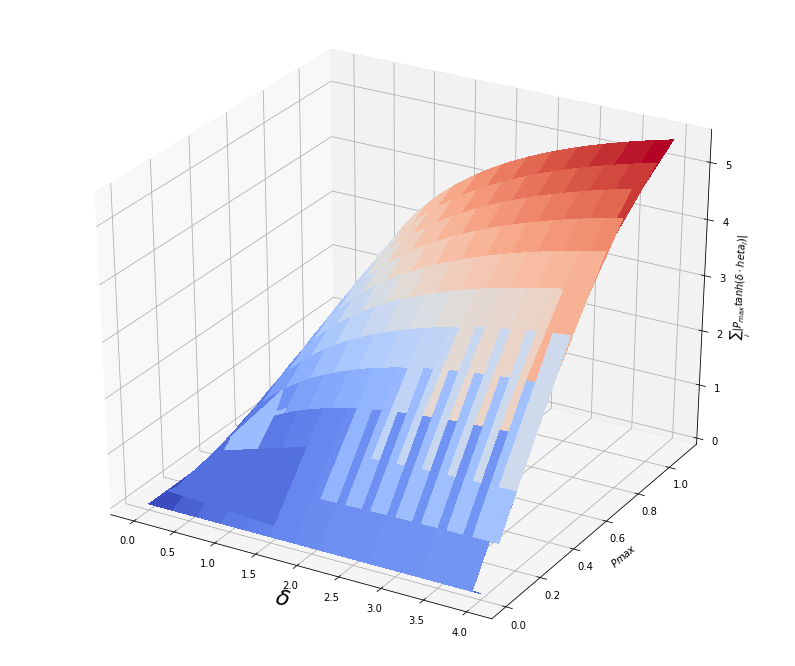

In [67]:
fig = plt.figure(figsize=(14,12))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('$\delta$', fontsize=22, rotation=150)
ax.set_ylabel('$Pmax$', fontsize=10)
ax.set_zlabel('$\sum_i | P_{max} tanh( \delta \cdot \theta_{i} )| $', fontsize=10, rotation=60)
plt.show()